In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

[0.1    0.1875 0.275  0.3625 0.45  ]


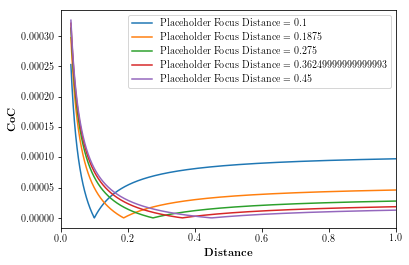

[2019-06-15 18:25:09,081] [backend_pdf.py:685] DEBUG: Assigning font /b'F1' = b'cmr10' (dvi)
[2019-06-15 18:25:09,083] [backend_pdf.py:685] DEBUG: Assigning font /b'F2' = b'cmmi10' (dvi)
[2019-06-15 18:25:09,107] [backend_pdf.py:685] DEBUG: Assigning font /b'F3' = b'cmbx10' (dvi)
[2019-06-15 18:25:09,265] [backend_pdf.py:699] DEBUG: Embedding Type-1 font b'cmbx10' from dvi.
[2019-06-15 18:25:09,266] [backend_pdf.py:731] DEBUG: Embedding TeX font b'cmbx10' - fontinfo={'dvifont': <matplotlib.dviread.DviFont object at 0x7fa0814344c0>, 'pdfname': <Name b'F3'>, 'fontfile': '/usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmbx10.pfb', 'basefont': b'CMBX10', 'encodingfile': None, 'effects': {}}
[2019-06-15 18:25:09,292] [backend_pdf.py:699] DEBUG: Embedding Type-1 font b'cmmi10' from dvi.
[2019-06-15 18:25:09,293] [backend_pdf.py:731] DEBUG: Embedding TeX font b'cmmi10' - fontinfo={'dvifont': <matplotlib.dviread.DviFont object at 0x7fa082305518>, 'pdfname': <Name b'F2'>, 'fontfil

In [16]:
#import matplotlib.pyplot as plt
import torch
import numpy as np
from tools.latex import plot_data, plot_latex

from tools.camera_lens import CameraLens

focal_length = 4.2e-3
f_number = 1.7
#aperture_radius = 0.01

# depth scaling = 10!!!!!!

def get_coc_plot_data(focus_dists):
    depth = torch.linspace(0.03, 6, 100000)
    #focus_dists = np.linspace(0.5, 1.5, 30)

    #plt.ylim(top=0.004)
    
    lens = CameraLens(focal_length, f_number=f_number, depth_scale=1)

    print(focus_dists)
    
    x = [np.array(depth)] * len(focus_dists)
    
    y = [
        np.array(lens.get_coc(focus_dist, depth))
        for focus_dist in focus_dists
    ]
    
    label = [
        f"Placeholder Focus Distance = {f}" for f in focus_dists
    ]
        
    return {"x": x, "y": y, "label": label}
    
#plt.ylim(0, 0.0007)
focus_dist = np.linspace(0.1, 0.45, 5)
plot_latex(get_coc_plot_data(focus_dist), xlim=(0, 1), xlabel="Distance", ylabel="CoC")